## UCB (Upper Confidence Bound) methods

- action a의 불확실성 또는 분산을 기반으로 action space를 탐색
- $A_n=argmax_a(Q_n(a)+c\sqrt{\frac{log(n)}{N_n(a)}})$
- a가 아직 explored 되지 않았다면, a에 대한 정보가 없어서 무한대의 분산을 가지며 선택된다
- $N_n(a)=0$ 은 python 상 error가 난다 -> 1로 초기화 (division by zero를 피함)

In [3]:
import numpy as np 
import matplotlib.pyplot as plt

class ucb_bandit:
    '''
    Upper Confidence Bound k-bandit problem

    Inputs 
    ============================================
    k: number of arms (int)
    c:
    iters: number of steps (int)
    mu: set the average rewards for each of the k-arms.
        Set to "random" for the rewards to be selected from
        a normal distribution with mean = 0. 
        Set to "sequence" for the means to be ordered from 
        0 to k-1.
        Pass a list or array of length = k for user-defined
        values.
    '''
    
    def __init__(self, k, c, iters, mu='random'):
        # Number of arms
        self.k = k
        # Exploration parameter
        self.c = c
        # Number of iterations
        self.iters = iters
        # Step count
        self.n = 1
        # Step count for each arm
        self.k_n = np.ones(k)
        # Total mean reward
        self.mean_reward = 0
        self.reward = np.zeros(iters)
        # Mean reward for each arm
        self.k_reward = np.zeros(k)

        if type(mu) == list or type(mu).__module__ == np.__name__:
            # User-defined averages            
            self.mu = np.array(mu)
        elif mu == 'random':
            # Draw means from probability distribution
            self.mu = np.random.normal(0, 1, k)
        elif mu == 'sequence':
            # Increase the mean for each arm by one
            self.mu = np.linspace(0, k-1, k)
            
    def pull(self):
        # Select action according to UCB Criteria
        a = np.argmax(self.k_reward + self.c * np.sqrt(np.log(self.n))/self.k_n)
        
        reward = np.random.normal(self.mu[a], 1)
        
        # Update counts
        self.n += 1
        self.k_n[a] += 1
        
        # Update total
        self.mean_reward = self.mean_reward + (reward - self.mean_reward) / self.n
        
        # Update results for a_k
        self.k_reward[a] = self.k_reward[a] + (reward - self.k_reward[a]) / self.k_n[a]
        
    def run(self):
        for i in range(self.iters):
            self.pull()
            self.reward[i] = self.mean_reward
        
    def reset(self, mu=None):
        # Resets results while keeping settings
        self.n = 1
        self.k_n = np.ones(self.k)
        self.mean_reward = 0
        self.reward = np.zeros(iters)
        self.k_reward = np.zeros(self.k)
        if mu == 'random':
            self.mu = np.random.normal(0, 1, self.k)

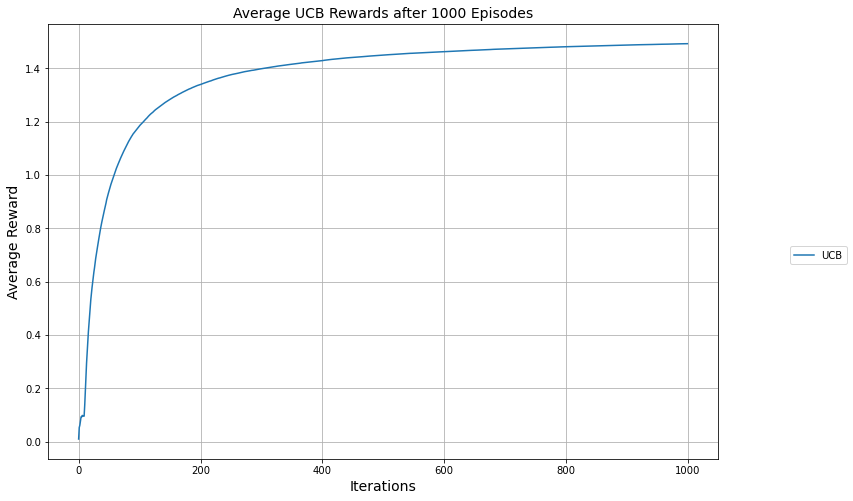

In [4]:
k = 10
iters = 1000

ucb_rewards = np.zeros(iters)
# Initialize bandits
ucb = ucb_bandit(k, 2, iters) # c=2

episodes = 1000
# Run experiments
for i in range(episodes): 
    ucb.reset('random')
    # Run experiments
    ucb.run()

    # Update long-term averages
    ucb_rewards = ucb_rewards + (ucb.reward - ucb_rewards) / (i + 1) # 한 episode가 끝나고 후 가장 마지막의 reward으로 평균 reward 업데이트

plt.figure(figsize=(12,8))
plt.plot(ucb_rewards, label="UCB")
plt.legend(bbox_to_anchor=(1.2, 0.5))
plt.xlabel("Iterations", fontsize=14)
plt.ylabel("Average Reward", fontsize=14)
plt.title("Average UCB Rewards after " + str(episodes) + " Episodes", fontsize=14)
plt.grid()
plt.show()

$\epsilon$-greedy 방법 (+ 변형) 과 비교했을 때 UCB는 훨씬 효과적인 알고리즘